# <span style="color:#8E44AD; font-family:'Courier New'; font-size:42px; font-weight:bold; text-shadow: 2px 2px 5px #BBB;">Step 1|| Import necessary libraries</span>


In [33]:
# Import necessary libraries for data manipulation and analysis
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data splitting and cross-validation tools
from sklearn.model_selection import train_test_split, cross_val_score

# Importing preprocessing modules for feature scaling and encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Importing various classifiers for machine learning models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Importing metrics to evaluate the models
from sklearn.metrics import accuracy_score


# <span style="color:#8E44AD; font-family:'Courier New'; font-size:42px; font-weight:bold; text-shadow: 2px 2px 5px #BBB;">Step 2|| Load Dataset</span>


In [3]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [4]:
df.sample(12)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
25937,Male,6.0,0,0,never,25.59,4.5,90,0
70357,Female,55.0,0,0,never,21.70,4.5,158,0
88463,Male,19.0,0,0,No Info,24.32,6.5,90,0
11055,Male,17.0,0,0,No Info,20.51,4.5,145,0
39931,Female,14.0,0,0,never,27.32,5.8,130,0
223,Female,60.0,0,0,former,34.31,6.1,100,0
80830,Female,3.0,0,0,No Info,13.12,6.6,130,0
86860,Female,61.0,0,0,never,23.17,6.2,80,0
2274,Male,43.0,0,0,No Info,27.32,3.5,159,0
22364,Female,20.0,0,0,never,27.32,6.0,200,0


# <span style="color:#8E44AD; font-family:'Courier New'; font-size:42px; font-weight:bold; text-shadow: 2px 2px 5px #BBB;">Step 3|| Exploratory Data Analysis</span>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.describe().style.background_gradient(cmap='coolwarm').set_caption("Descriptive Statistics")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.074850,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.263150,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
df['smoking_history'].value_counts().reset_index().rename(columns={'index': 'Smoking History', 'smoking_history': 'info'}).style.background_gradient(cmap='coolwarm').set_caption("Smoking History Counts")


,info,count
0,No Info,35816
1,never,35095
2,former,9352
3,current,9286
4,not current,6447
5,ever,4004


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


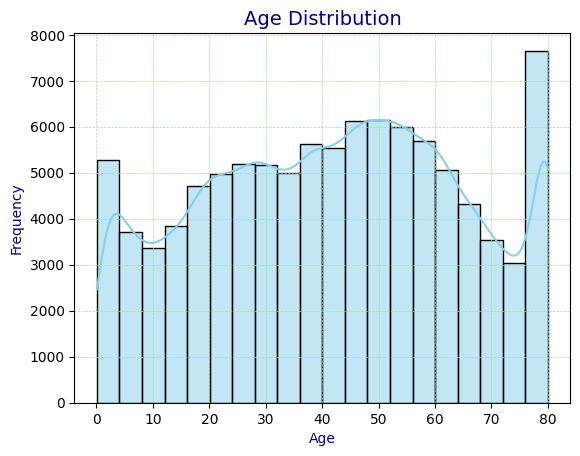

In [9]:
sns.histplot(df['age'],kde=True,bins=20,color='skyblue')
plt.title('Age Distribution',color='darkblue',fontsize=14)
plt.xlabel('Age',color='darkblue')
plt.ylabel('Frequency',color='darkblue')
plt.grid(color='lightgreen',linestyle='--',linewidth=0.5)
plt.show()

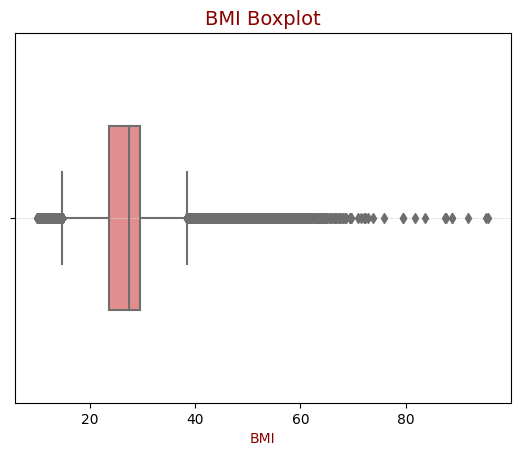

In [10]:
# Boxplot with color
sns.boxplot(x=df['bmi'], color='lightcoral', width=0.5)
plt.title("BMI Boxplot", color='darkred', fontsize=14)
plt.xlabel("BMI", color='darkred')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
plt.show()

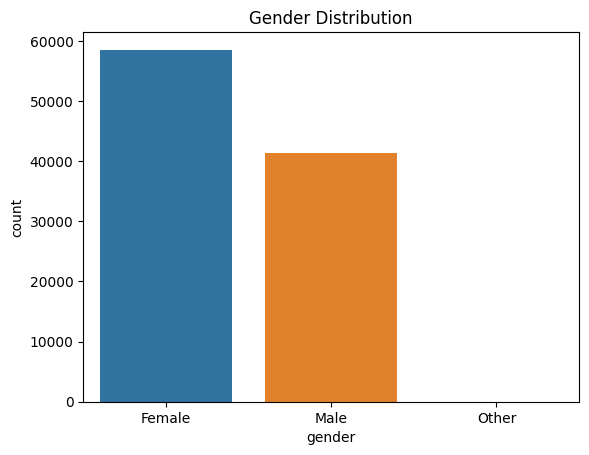

In [11]:
sns.countplot(x=df['gender'])
plt.title("Gender Distribution")
plt.show()

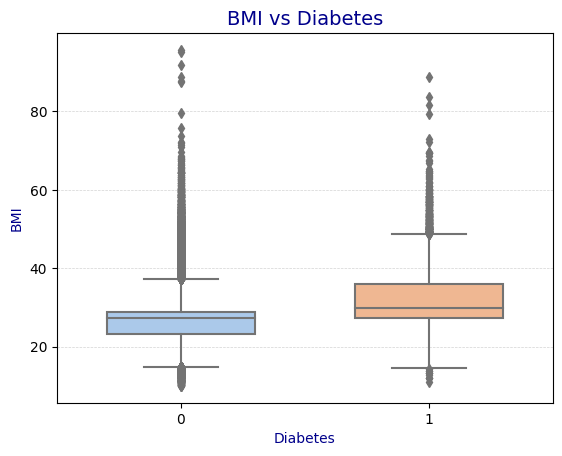

In [12]:
# Boxplot with custom colors
sns.boxplot(x='diabetes', y='bmi', data=df, palette='pastel', width=0.6)
plt.title("BMI vs Diabetes", color='darkblue', fontsize=14)
plt.xlabel("Diabetes", color='darkblue')
plt.ylabel("BMI", color='darkblue')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
plt.show()

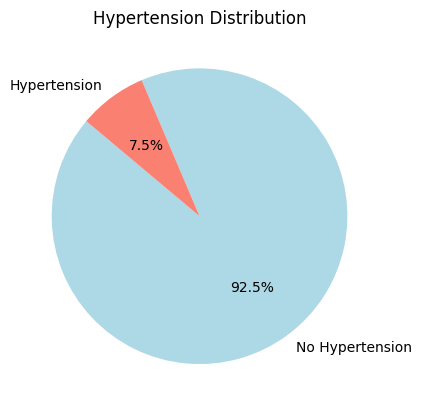

In [13]:
# Pie chart for Hypertension
hypertension_counts = df['hypertension'].value_counts()
hypertension_labels = ['No Hypertension', 'Hypertension']
plt.pie(hypertension_counts, labels=hypertension_labels, autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=140)
plt.title('Hypertension Distribution')
plt.show()


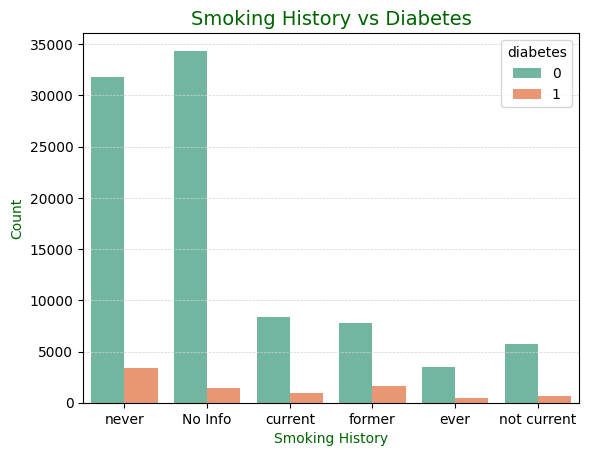

In [14]:
# Countplot with custom colors
sns.countplot(x='smoking_history', hue='diabetes', data=df, palette='Set2')
plt.title("Smoking History vs Diabetes", color='darkgreen', fontsize=14)
plt.xlabel("Smoking History", color='darkgreen')
plt.ylabel("Count", color='darkgreen')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, axis='y')
plt.show()

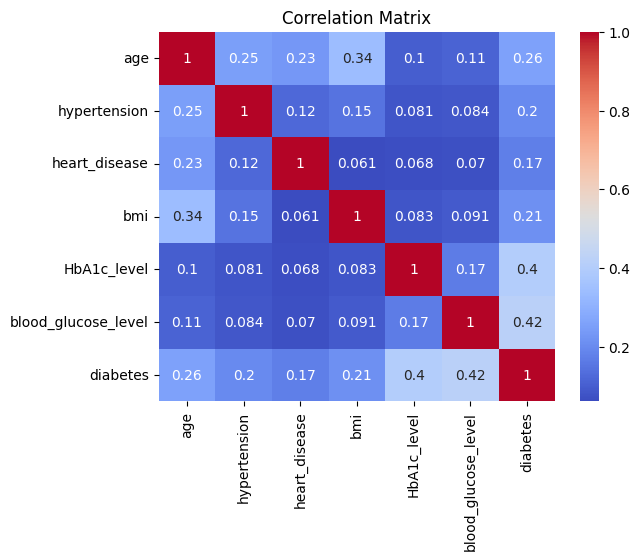

In [15]:
corr = df[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [16]:
diabetes_positive = df[df['diabetes'] == 1]
diabetes_negative = df[df['diabetes'] == 0]

print("Average BMI for Diabetes Positive: ", diabetes_positive['bmi'].mean())
print("Average BMI for Diabetes Negative: ", diabetes_negative['bmi'].mean())

Average BMI for Diabetes Positive:  31.988382352941176
Average BMI for Diabetes Negative:  26.88716349726776


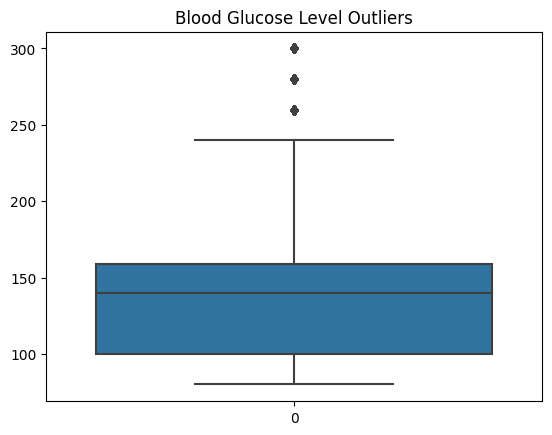

In [17]:
sns.boxplot(df['blood_glucose_level'])
plt.title("Blood Glucose Level Outliers")
plt.show()

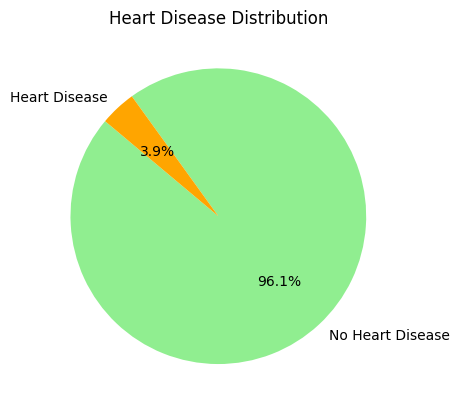

In [18]:
# Pie chart for Heart Disease
heart_disease_counts = df['heart_disease'].value_counts()
heart_disease_labels = ['No Heart Disease', 'Heart Disease']
plt.pie(heart_disease_counts, labels=heart_disease_labels, autopct='%1.1f%%', colors=['lightgreen', 'orange'], startangle=140)
plt.title('Heart Disease Distribution')
plt.show()


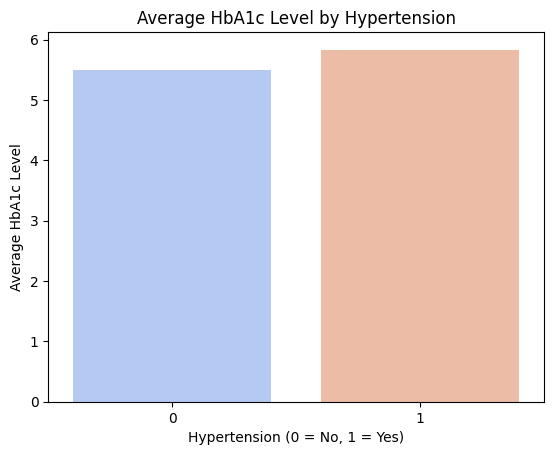

In [19]:
# Bar plot for average HbA1c level by Hypertension
avg_hba1c_by_hypertension = df.groupby('hypertension')['HbA1c_level'].mean().reset_index()
sns.barplot(x='hypertension', y='HbA1c_level', data=avg_hba1c_by_hypertension, palette='coolwarm')
plt.title('Average HbA1c Level by Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Average HbA1c Level')
plt.show()


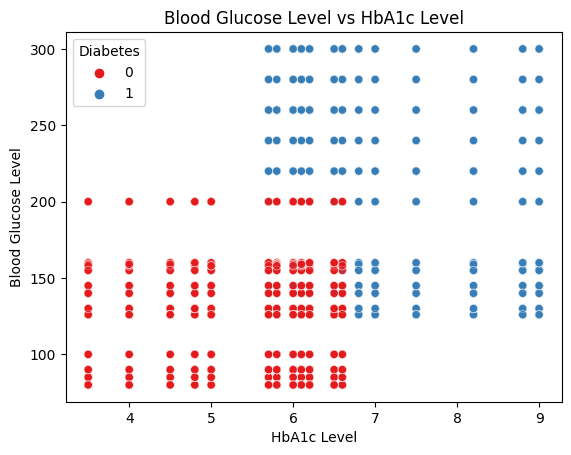

In [20]:
# Scatter plot for Blood Glucose Level vs HbA1c Level
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', hue='diabetes', data=df, palette='Set1', alpha=0.7)
plt.title('Blood Glucose Level vs HbA1c Level')
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.legend(title='Diabetes')
plt.show()


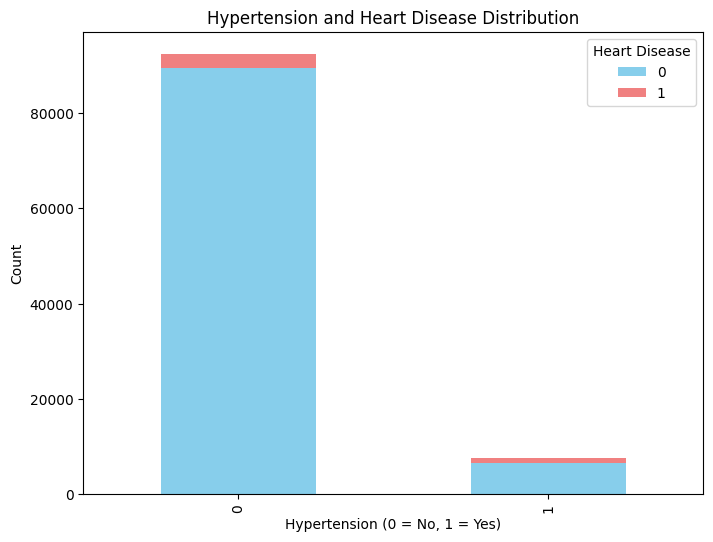

In [21]:
# Stacked bar plot for Hypertension and Heart Disease
hypertension_heart = df.groupby(['hypertension', 'heart_disease']).size().unstack()
hypertension_heart.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(8, 6))
plt.title('Hypertension and Heart Disease Distribution')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()


# <span style="color:#8E44AD; font-family:'Courier New'; font-size:42px; font-weight:bold; text-shadow: 2px 2px 5px #BBB;">Step 4|| ML Models</span>


In [23]:
# Define X (features) and y (target)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = ['gender', 'smoking_history']
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scaling for numerical columns
        ('cat', OneHotEncoder(), categorical_cols)   # One-hot encoding for categorical columns
    ])

# Function to train and evaluate each model
def train_model(model, model_name):
    # Create a pipeline that first applies preprocessing and then the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')

# List of models to train and evaluate
models = [
    (RandomForestClassifier(), 'Random Forest Classifier'),
    (KNeighborsClassifier(), 'K-Nearest Neighbors (KNN)'),
    (AdaBoostClassifier(), 'AdaBoost Classifier'),
    (LogisticRegression(), 'Logistic Regression'),
    (DecisionTreeClassifier(), 'Decision Tree Classifier'),
    (SVC(), 'Support Vector Classifier (SVC)')  # Optional: if you want to try this model too
]

# Train and evaluate each model one by one
for model, model_name in models:
    train_model(model, model_name)

Random Forest Classifier Accuracy: 0.9695
K-Nearest Neighbors (KNN) Accuracy: 0.9625
AdaBoost Classifier Accuracy: 0.9719
Logistic Regression Accuracy: 0.9586
Decision Tree Classifier Accuracy: 0.9498
Support Vector Classifier (SVC) Accuracy: 0.9643


In [24]:


# Define individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)

# 1. **Voting Classifier**: Combine models using majority voting (soft voting for probability-based models)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), 
    ('knn', knn),
    ('ada', ada),
    ('lr', lr),
    ('dt', dt),
    ('svc', svc)
], voting='soft')

# 2. **Stacking Classifier**: Use a meta-model to combine predictions of base models
stacking_clf = StackingClassifier(estimators=[
    ('rf', rf),
    ('knn', knn),
    ('ada', ada),
    ('dt', dt)
], final_estimator=LogisticRegression())

# 3. **Bagging Classifier**: Use multiple copies of a base model with bagging
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Define a dictionary to store classifiers and their names
models = {
    'Voting Classifier': voting_clf,
    'Stacking Classifier': stacking_clf,
    'Bagging Classifier': bagging_clf
}

# Train and evaluate all models
for model_name, model in models.items():
    # Create a pipeline with preprocessor and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Evaluate on test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{model_name} Accuracy: {accuracy:.4f}')


Voting Classifier Accuracy: 0.9699
Stacking Classifier Accuracy: 0.9711


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Accuracy: 0.9684


In [36]:
# Apply cross-validation to the pipeline
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=20, scoring='accuracy')

# Display the cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores)}")

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/en

Cross-validation accuracy scores: [0.96825 0.9635  0.9685  0.97    0.96825 0.971   0.96775 0.967   0.967
 0.968   0.9725  0.97025 0.97025 0.969   0.9695  0.968   0.96625 0.968
 0.9675  0.96775]
Mean cross-validation accuracy: 0.9684125


# <span style="color:#8E44AD; font-family:'Courier New'; font-size:42px; font-weight:bold; text-shadow: 2px 2px 5px #BBB;">Step 5|| Conclusion:</span>

## `AdaBoost Classifier` is the most accurate model for this dataset and is the recommended choice for this classification task.